<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952     

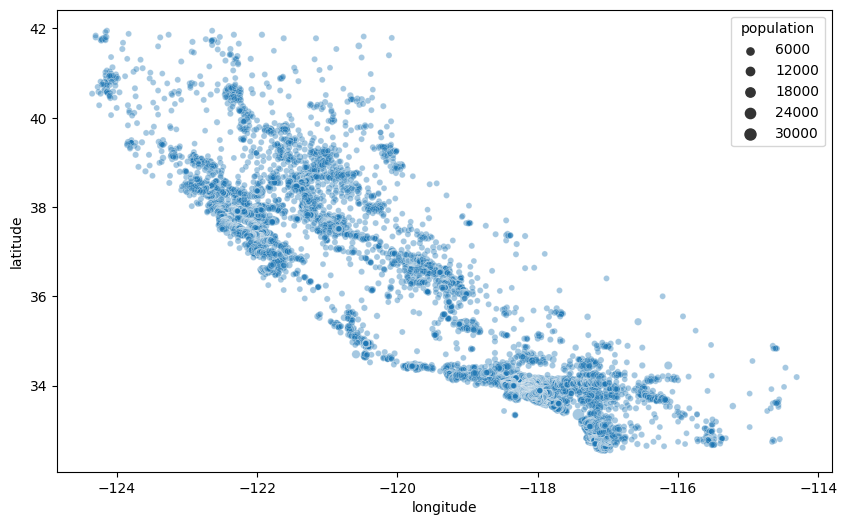

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium #구글맵 가져오는 라이브러리
from folium.plugins import FastMarkerCluster
#1. 데이터 불러오기
housing = pd.read_csv("housing.csv")
housing
housing.info() #데이터 정보 확인
print(housing.describe()) # r언어의 tidyverse 중 summary()와 같음

#위도, 경도, 인구수를 설정해서 지도에 표시해보기
plot_data = housing[["longitude","latitude","population"]] # housing 데이터프레임에서 "longitude","latitude","population"을 추출해서 데이터프레임으로 저장
plt.figure(figsize=(10,6)) #그래프의 크기 설정
sns.scatterplot(x="longitude",y="latitude",size="population", data=plot_data, alpha=0.4) 
plt.show()

# 캘리포니아 지도의 중심 좌표
center = [36.7783, -119.4179]

# folium 지도 객체 생성
map_california = folium.Map(location=center, zoom_start=5,width=750, 
               height=500) #ㄹolium.Map() 함수를 사용하여 map_california라는 지도 객체를 생성합니다. location 매개변수에는 중심 좌표를, zoom_start 매개변수에는 초기 줌 레벨을 설정합니다.

# scatter plot 데이터를 기반으로 FastMarkerCluster 생성
marker_cluster = FastMarkerCluster(data=housing[['latitude', 'longitude', 'population']].values.tolist())

# FastMarkerCluster를 지도에 추가
marker_cluster.add_to(map_california)

# folium 지도 출력
map_california

